# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()
#We need to sift out the years&dates, groupby TMAX&TMIN from the sample of dataframe.

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
years = list(range(len(df)))
days = list(range(len(df)))
for i in range(len(df)):
    years[i] = (df['Date'][i]).split('-')[0]
    days[i] = (df['Date'][i]).split('-')[1] + (df['Date'][i]).split('-')[2]
df['years'] = years
df['days'] = days
df = df[df['days'] != '0229']
df15 = df[df['years'] == '2015']
df_rest = df[~(df['years'] == '2015')]
df15max = df15[df15['Element'] == 'TMAX']
df15min = df15[df15['Element'] == 'TMIN']
df_restmax = df_rest[df_rest['Element'] == 'TMAX']
df_restmin = df_rest[df_rest['Element'] == 'TMIN']
max15 = df15max.groupby('days').agg({'Data_Value':max}).reset_index()
min15 = df15min.groupby('days').agg({'Data_Value':min}).reset_index()
max_rest = df_restmax.groupby('days').agg({'Data_Value':max}).reset_index()
min_rest = df_restmin.groupby('days').agg({'Data_Value':min}).reset_index()
maxim15 = pd.merge(max15, max_rest, on = 'days', how = 'outer')
minum15 = pd.merge(min15, min_rest, on = 'days', how = 'outer')
# Data_Value_x is the max15, Data_Value_y is the max_rest, comparying for the break
breakmax = maxim15[maxim15['Data_Value_x'] > maxim15['Data_Value_y']].drop(['Data_Value_y'], axis=1)
breakmin = minum15[minum15['Data_Value_x'] < minum15['Data_Value_y']].drop(['Data_Value_y'], axis=1)
# Check if we only get the numbers of the breakvalues for the max_2015, which are stored in Data_Value_x
print(breakmax)

     days  Data_Value_x
39   0209            83
106  0417           278
126  0507           306
127  0508           333
130  0511           306
137  0518           317
207  0727           339
209  0729           361
230  0819           328
249  0907           350
250  0908           339
258  0916           311
259  0917           317
260  0918           300
270  0928           294
271  0929           283
292  1020           272
305  1102           228
306  1103           261
307  1104           261
308  1105           256
309  1106           239
321  1118           200
340  1207           100
341  1208           100
342  1209           122
343  1210           150
344  1211           156
345  1212           200
346  1213           194
347  1214           183
348  1215           161
349  1216           150
356  1223           183
357  1224           172
358  1225           111
359  1226           117


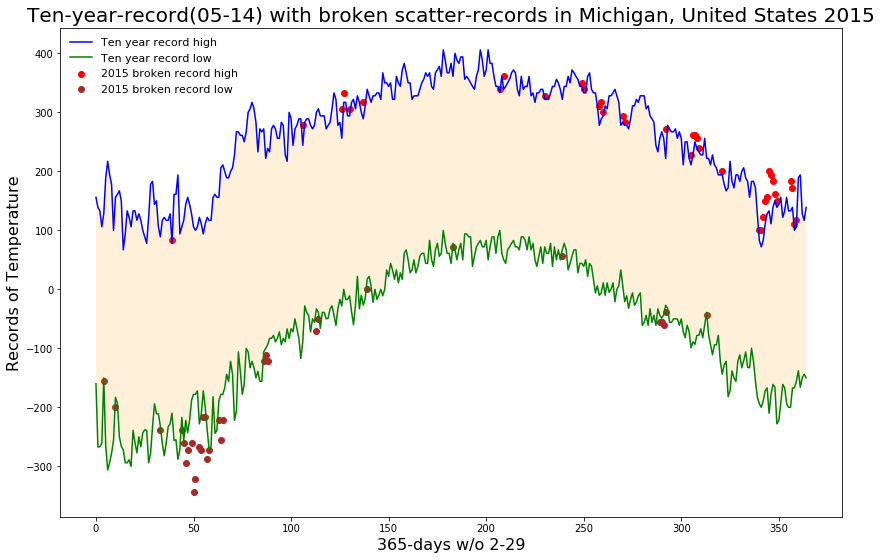

In [4]:
# Lets start the plot by %matplotlib inline, fit-in plot without plt.show()
%matplotlib inline
plt.figure(figsize=(14,9))

plt.plot(max_rest.index, max_rest['Data_Value'], c = 'blue', label ='Ten year record high')
plt.plot(min_rest.index, min_rest['Data_Value'], c = 'green', label ='Ten year record low')

# To be honest, I do not wannt to seperate the colors for break, initial set was all red
# However, the legend has to tell the difference, basically the top is the max break records, bottom reversely
plt.scatter(breakmax.index, breakmax['Data_Value_x'], c = 'red', label = "2015 broken record high")
plt.scatter(breakmin.index, breakmin['Data_Value_x'], c = 'brown', label = "2015 broken record low")

plt.gca().fill_between(range(len(max_rest)), 
                       np.array(max_rest['Data_Value']), 
                       np.array(min_rest['Data_Value']), 
                       facecolor='orange', 
                       alpha=0.15)

plt.xlabel('365-days w/o 2-29', fontsize=16)
plt.ylabel('Records of Temperature', fontsize=16)
plt.title('Ten-year-record(05-14) with broken scatter-records in Michigan, United States 2015', fontsize=20)
plt.legend(loc = 2, frameon = False, fontsize = 11)
